In [400]:
import numpy as np
from matplotlib import pyplot as plt

In [401]:
plt.rcParams["font.family"] = "monospace"
plt.rcParams.update({'font.size': 14})

In [402]:
csv_path = "mtfuji_data.csv"

np.set_printoptions(suppress=True)
fuji_data = np.loadtxt(csv_path, delimiter=",", skiprows=1)

print(fuji_data.shape)
print(fuji_data[130:140])

(300, 5)
[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


<h3>[Problem 1] Visualization of data<h3>

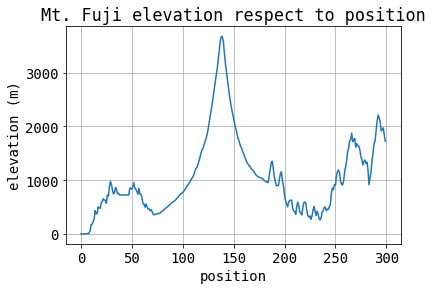

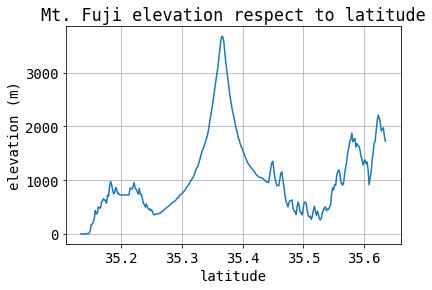

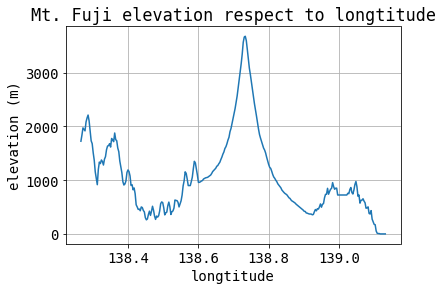

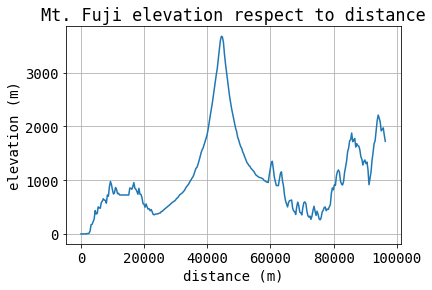

In [403]:
plt.grid()
plt.title("Mt. Fuji elevation respect to position")
plt.xlabel("position")
plt.ylabel("elevation (m)")
plt.plot(fuji_data[:, 0], fuji_data[:, 3])
plt.show()

plt.grid()
plt.title("Mt. Fuji elevation respect to latitude")
plt.xlabel("latitude")
plt.ylabel("elevation (m)")
plt.plot(fuji_data[:, 1], fuji_data[:, 3])
plt.show()

plt.grid()
plt.title("Mt. Fuji elevation respect to longtitude")
plt.xlabel("longtitude")
plt.ylabel("elevation (m)")
plt.plot(fuji_data[:, 2], fuji_data[:, 3])
plt.show()

plt.grid()
plt.title("Mt. Fuji elevation respect to distance")
plt.xlabel("distance (m)")
plt.ylabel("elevation (m)")
plt.plot(fuji_data[:, 4], fuji_data[:, 3])
plt.show()

<h3>[Problem 2] Create a function to calculate the slope of a point<h3>

In [404]:
def calculate_slope_at_current_point(curr_point=None, data=fuji_data):
    '''
    A function calculates the slope of elevation (m) of Mt. Fuji (default) respect to a current point and the closest previous point.
    Parameters:
    ----------
    curr_point: int
        current point that is used to calculate the slope. (> 0)
    data: ndarray
        the dataset. (default: fuji_data)
    Return:
    ----------
    gradient d_y / d_x: float
        The slope at the current point.
    '''

    if (curr_point == 0):
        raise Exception("invalid current point which is {}".format(curr_point))

    d_x = data[curr_point, 0] - data[curr_point - 1, 0]
    d_y = data[curr_point, 3] - data[curr_point - 1, 3]

    return d_y / d_x

In [405]:
print("The slope at point 200: {}".format(calculate_slope_at_current_point(200)))
print("The slope at point 100: {}".format(calculate_slope_at_current_point(100)))

try:
    print("The slope at point 0: {}".format(calculate_slope_at_current_point(0)))
except Exception as error:
    print("ERROR: {}".format(error))

The slope at point 200: -171.5
The slope at point 100: 18.90000000000009
ERROR: invalid current point which is 0


<h3>[Problem 3] Create a function to calculate the destination<h3>

In [406]:
def calculate_next_point(curr_point=None, alpha=0.2, curr_gradient=None):
    '''
    A function calculates the next destination point based on the slope at the current point.
    Parameters:
    ----------
    curr_point: int
        current point. (> 0)
    alpha: float
        The hyperparameter. (default: 0.2)
    curr_grandient: float
        Slope at the current point.
    Return:
    ----------
    next destination point: int
        The next destination point. If this destination point less than or equal zero, raise an exception.
    '''

    next_point = np.round(curr_point - alpha * curr_gradient).astype(np.int64)
    if (next_point <= 0):
        raise Exception("destination point <= 0, which is invalid")

    return next_point

In [407]:
curr_point = 100
alpha = 0.2
curr_gradient = calculate_slope_at_current_point(curr_point)

try:
    print("Next destination point: {}".format(calculate_next_point(curr_point, alpha, curr_gradient)))
except Exception as err:
    print("ERROR: {}".format(err))

Next destination point: 96


<h3>[Problem 4] Creating a function to go down the mountain<h3>

In [408]:
def generate_next_points_array(initial_point, alpha=0.2):
    '''
    A function generate array of destination points based on gradient descend.
    ----------
    initial_point: int
        initial point. (> 0)
    alpha: float
        The hyperparameter. (default: 0.2)
    Return:
    ----------
    next destination points array: ndarray
        The destination array.
    '''
    points_ndarray = np.array([initial_point])

    gradient = calculate_slope_at_current_point(points_ndarray[-1])
    new_point = calculate_next_point(points_ndarray[-1], alpha, gradient)
    while (points_ndarray[-1] != new_point):
        points_ndarray = np.append(points_ndarray, new_point)
        gradient = calculate_slope_at_current_point(points_ndarray[-1])
        new_point = calculate_next_point(points_ndarray[-1], alpha, gradient)
    
    return points_ndarray.reshape(points_ndarray.shape[0], 1)

In [409]:
initial_point = 136
alpha_2 = 0.2

try:
    points_ndarray = generate_next_points_array(initial_point, alpha_2)
    print(points_ndarray.shape)
    print(points_ndarray)
except Exception as err:
    print("ERROR: {}".format(err))

(14, 1)
[[136]
 [102]
 [ 98]
 [ 95]
 [ 93]
 [ 89]
 [ 85]
 [ 82]
 [ 79]
 [ 73]
 [ 70]
 [ 78]
 [ 77]
 [ 75]]


<h3>[Problem 5] Visualization of the descent process<h3>

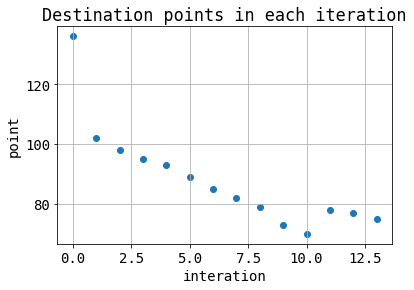

In [414]:
plt.grid()
plt.title("Destination points in each iteration")
plt.xlabel("interation")
plt.ylabel("point")
plt.scatter(np.arange(0, points_ndarray.size), points_ndarray[:, 0])
plt.show()